In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [216]:
awards = pd.read_csv('base.csv')
cols_to_drop = ['seas_id', 'season', 'player_id', 'player', 'dpoy', 'mip', 'nba mvp', 'nba roy', 'smoy']
X = awards.drop(cols_to_drop, axis=1)
y = awards['smoy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [218]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg_linear.predict(X_test)
mse = mean_squared_error(y_pred, y_test)
r2_error = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE for SMOY Award Shares is {np.round(mse, 3)}")
print(f"R-squared error for SMOY is {np.round(r2_error, 3)}")
print(f"Mean Absolute Error for SMOY is: {np.round(mae, 3)}")

MSE for SMOY Award Shares is 0.002
R-squared error for SMOY is 0.084
Mean Absolute Error for SMOY is: 0.01


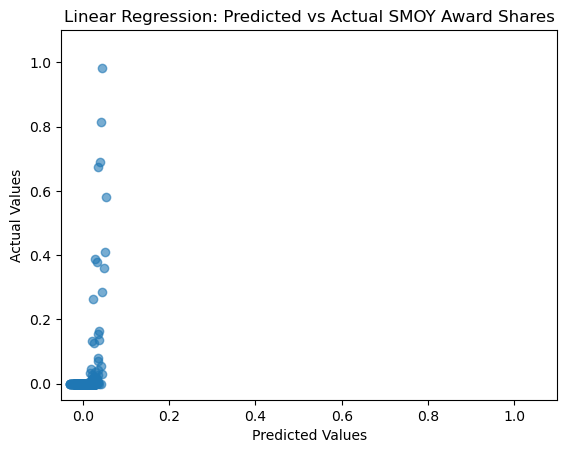

In [220]:
plt.scatter(y_pred, y_test, alpha=0.6)
plt.xlim([-0.05, 1.1])
plt.ylim([-0.05, 1.1])
plt.title("Linear Regression: Predicted vs Actual SMOY Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [222]:
gbr = GradientBoostingRegressor(random_state=1)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_error = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {np.round(mse, 3)}')
print(f'R-squared: {np.round(r2_error, 3)}')
print(f'Mean Absolute Error: {np.round(mae, 3)}')

Mean Squared Error: 0.001
R-squared: 0.308
Mean Absolute Error: 0.005


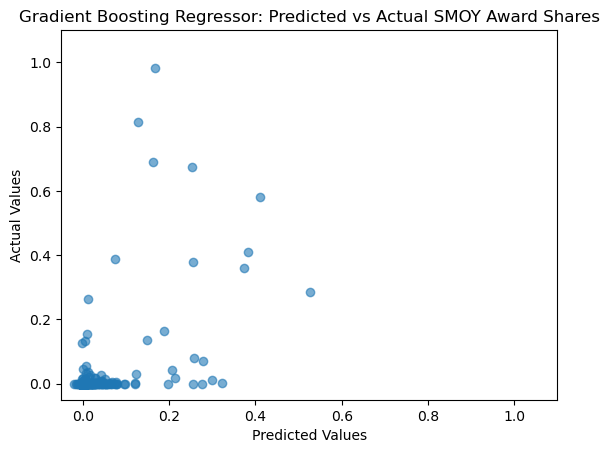

In [223]:
plt.scatter(y_pred, y_test, alpha=0.6)
plt.xlim([-0.05, 1.1])
plt.ylim([-0.05, 1.1])
plt.title("Gradient Boosting Regressor: Predicted vs Actual SMOY Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [224]:
lasso = Lasso(alpha=0.1, random_state=1)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_error = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {np.round(mse, 3)}')
print(f'R-squared: {np.round(r2_error, 3)}')
print(f'Mean Absolute Error: {np.round(mae, 3)}')

Mean Squared Error: 0.002
R-squared: 0.044
Mean Absolute Error: 0.008


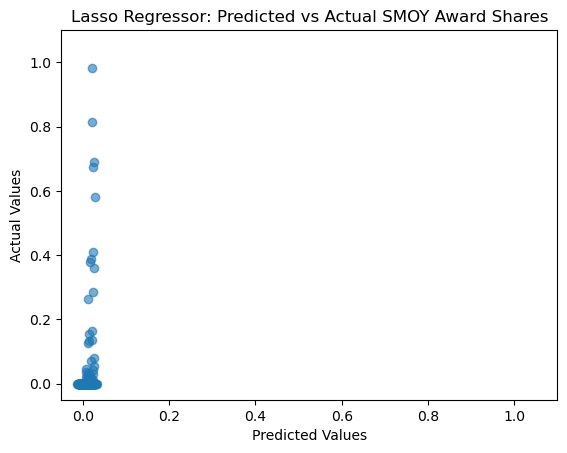

In [225]:
plt.scatter(y_pred, y_test, alpha=0.6)
plt.xlim([-0.05, 1.1])
plt.ylim([-0.05, 1.1])
plt.title("Lasso Regressor: Predicted vs Actual SMOY Award Shares")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()